# Part I - Loan Data from Prosper: Data Exploration
## by Brian Onyango

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

### Reading the Data


In [2]:
df = pd.read_csv("prosperLoanData.csv")

### Checking the Data

In [3]:
# Determining the no. of records in our dataset
print(df.shape)

(113937, 81)


In [4]:
# Previewing the top of our dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# Previewing the bottom of our dataset
df.tail() 

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Data Preperation/Tidying the Dataset

Validation

In [7]:
# Checking for irrelevant columns
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

> This data set has 81 variables but our analysis will only focus on 13 variables. i.e "Term","LoanStatus","List. We will create a new dataset with only these variables

In [8]:
df = df[["Term","LoanStatus","ListingCategory (numeric)","BorrowerState","Occupation","EmploymentStatus","EmploymentStatusDuration","IsBorrowerHomeowner","StatedMonthlyIncome","LoanOriginalAmount","MonthlyLoanPayment","InvestmentFromFriendsCount","Investors"]]

Completeness

In [9]:
# Checking for missing values
df.isnull().any().any()

True

We have null values/ Missing values in our dataset. Let.s preview which columns are affected:

In [10]:
# Identifying the Missing Data
df.isnull().sum()

Term                             0
LoanStatus                       0
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
StatedMonthlyIncome              0
LoanOriginalAmount               0
MonthlyLoanPayment               0
InvestmentFromFriendsCount       0
Investors                        0
dtype: int64

In [11]:
# Checking percentage of missing values per columns
missing_columns = []
for i, col in enumerate(df.columns):
  missing = (df[col].isnull().sum()/df.shape[0])*100
  if missing > 0:
    missing_columns.append(col)
  print(f'{i+1}. {col} = {(df[col].isnull().sum()/df.shape[0])*100}%')

1. Term = 0.0%
2. LoanStatus = 0.0%
3. ListingCategory (numeric) = 0.0%
4. BorrowerState = 4.840394252964358%
5. Occupation = 3.149108717975723%
6. EmploymentStatus = 1.9791639239228696%
7. EmploymentStatusDuration = 6.692294864705935%
8. IsBorrowerHomeowner = 0.0%
9. StatedMonthlyIncome = 0.0%
10. LoanOriginalAmount = 0.0%
11. MonthlyLoanPayment = 0.0%
12. InvestmentFromFriendsCount = 0.0%
13. Investors = 0.0%


Since the missing values are very less, <5%, they won't affect our analysis thus will drop all rows with the missing values and maitain the columns.

In [12]:
# Dropping missing values
df = df.dropna()

In [13]:
# Checking for missing values again
df.isnull().any().any()

False

We have dropped all the missing values

 Consistency

In [14]:
# Checking for duplicates
df.duplicated().any().any()

True

We have duplicates rows in our dataset. Will drop them.

In [15]:
# Dropping duplicates
df.drop_duplicates(inplace = True)
# Checking changes
df.duplicated().any().any()

False

The duplicate data in our dataset have been dropped. The result dataset has no duplicates.

Uniformity

In [16]:
# Checking column names
df.columns

Index(['Term', 'LoanStatus', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'InvestmentFromFriendsCount', 'Investors'],
      dtype='object')

The columns naming is uniform but we will change all the names to lowercase

In [17]:
# Changing all column names to lower case
df.columns = df.columns.str.lower()
# Checking changes
df.columns

Index(['term', 'loanstatus', 'listingcategory (numeric)', 'borrowerstate',
       'occupation', 'employmentstatus', 'employmentstatusduration',
       'isborrowerhomeowner', 'statedmonthlyincome', 'loanoriginalamount',
       'monthlyloanpayment', 'investmentfromfriendscount', 'investors'],
      dtype='object')

Outliers

In [18]:
# Creating an outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [19]:
# Checking for Outliers
outliers(df)

Number of outliers = 50522
Percentage = 49.32247735082787%


<AxesSubplot:>

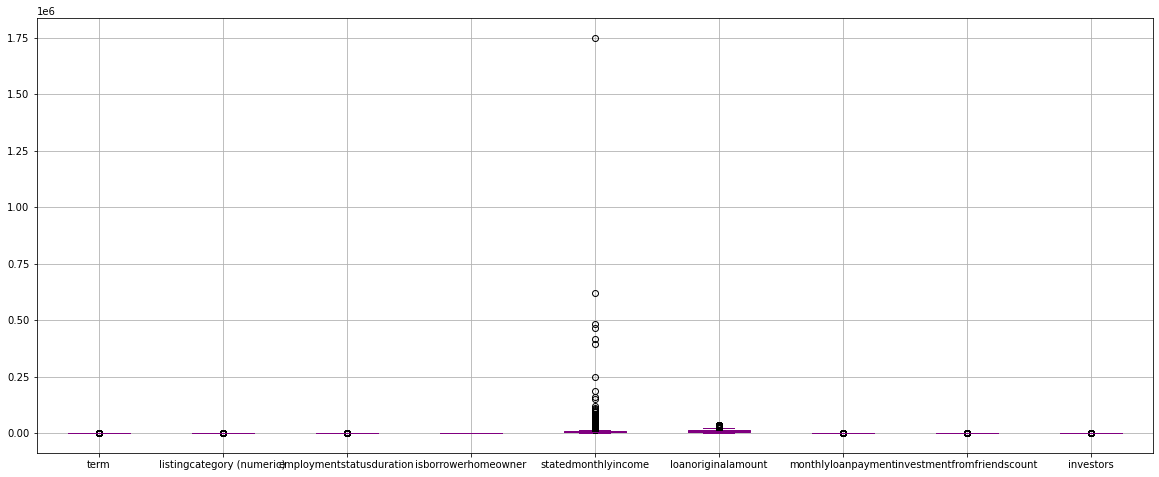

In [20]:
# Viewing the outliers
df.boxplot(figsize=(20,8),color='purple')

We have a majority of the outliers in statedmonthlyincome. We will keep all the data for further analysis

Anomalies

In [21]:
# Checking for Anomalies
df.describe()

,term,listingcategory (numeric),employmentstatusduration,statedmonthlyincome,loanoriginalamount,monthlyloanpayment,investmentfromfriendscount,investors
count,102432.000000,102432.000000,102432.000000,1.024320e+05,102432.000000,102432.000000,102432.000000,102432.000000
mean,41.240862,3.035175,96.923090,5.711368e+03,8587.705082,279.586892,0.024690,81.853142
std,10.791989,4.088556,93.917609,7.708091e+03,6275.825516,192.155915,0.240661,105.047908
min,12.000000,0.000000,0.000000,0.000000e+00,1000.000000,0.000000,0.000000,1.000000
25%,36.000000,1.000000,27.000000,3.333333e+03,4000.000000,139.350000,0.000000,1.000000
50%,36.000000,1.000000,68.000000,4.830458e+03,7000.000000,230.360000,0.000000,45.000000
75%,36.000000,3.000000,138.250000,6.964083e+03,12000.000000,378.050000,0.000000,118.000000
max,60.000000,20.000000,755.000000,1.750003e+06,35000.000000,2251.510000,33.000000,1189.000000


The max value in statedmonthlyincome looks out of range comopared to the mean of that column. A further analysis is needed to validate if this figure is true or it is an error

In [22]:
# checking the maximum value
df.statedmonthlyincome.max()

1750002.916667

<AxesSubplot:xlabel='statedmonthlyincome'>

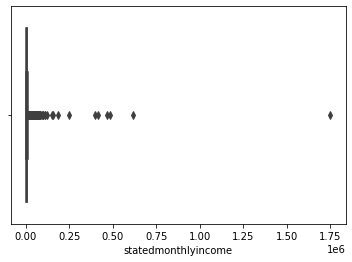

In [23]:
# viewing it keenly on the boxplot
sb.boxplot(df.statedmonthlyincome)

> There are high chances it was an error. A domain knowledgeg in this dataset or verifying from the source could help justify this step.

In [24]:
# Will drop this value.
df.drop(df[df['statedmonthlyincome'] > 1750000].index, inplace = True)

In [25]:
# Checking our dataset again
df.describe()

,term,listingcategory (numeric),employmentstatusduration,statedmonthlyincome,loanoriginalamount,monthlyloanpayment,investmentfromfriendscount,investors
count,102431.000000,102431.000000,102431.000000,102431.000000,102431.000000,102431.000000,102431.000000,102431.000000
mean,41.240913,3.035175,96.922924,5694.338840,8587.749871,279.587926,0.024690,81.853921
std,10.792029,4.088576,93.918052,5450.800118,6275.839780,192.156568,0.240662,105.048125
min,12.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,1.000000
25%,36.000000,1.000000,27.000000,3333.333333,4000.000000,139.350000,0.000000,1.000000
50%,36.000000,1.000000,68.000000,4830.333333,7000.000000,230.360000,0.000000,45.000000
75%,36.000000,3.000000,138.500000,6963.458334,12000.000000,378.050000,0.000000,118.000000
max,60.000000,20.000000,755.000000,618547.833333,35000.000000,2251.510000,33.000000,1189.000000


> Our dataset now looks okay.

### What is the structure of your dataset?

> This data set contains 113,937 observations with 81 variables of which the majority are numeric. A more detailed description of the data set can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

### What is/are the main feature(s) of interest in your dataset?

> This analysis will focus on understanding the profile information of a borrower. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 'term', 'loanstatus', 'listingcategory (numeric)', 'borrowerstate',
       'occupation', 'employmentstatus', 'employmentstatusduration',
       'isborrowerhomeowner', 'statedmonthlyincome', 'loanoriginalamount',
       'monthlyloanpayment', 'investmentfromfriendscount', 'investors'

## Univariate Exploration

> In this section, will investigate individual variables through charts, measures of central tendency and measure of dispersion/Variability/Spread. 


### Categorical Analysis

In [26]:
# Number of unique values
cols = df.columns.tolist()
print(f'Number of unique values\n')
for col in cols:
  print(f'{col}: {len(df[col].unique().tolist())}')

Number of unique values

term: 3
loanstatus: 12
listingcategory (numeric): 21
borrowerstate: 51
occupation: 67
employmentstatus: 7
employmentstatusduration: 595
isborrowerhomeowner: 2
statedmonthlyincome: 12068
loanoriginalamount: 2298
monthlyloanpayment: 21645
investmentfromfriendscount: 14
investors: 748


In [27]:
# Will replace the column listingcategory (numeric) with categorical values
#df["listingcategory (numeric)"].replace(to_replace=dict("Not Available"=0, "Debt Consolidation"=1), inplace=True)
df["listingcategory (numeric)"].replace([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],["Not Available", "Debt Consolidation","Home Improvement","Business","Personal Loan","Student Use","Auto","Other","Baby&Adoption","Boat","Cosmetic Procedure","Engagement Ring","Green Loans","Household Expenses","Large Purchases","Medical/Dental","Motorcycle","RV","Taxes","Vacation","Wedding Loans"], inplace=True)

0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [28]:
# Checking the updated column
df["listingcategory (numeric)"].unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

In [29]:
# columns with specific data type
integer_columns = df.select_dtypes(include=['int64']).columns
float_columns = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns

In [30]:
# categorical columns
object_columns

Index(['loanstatus', 'listingcategory (numeric)', 'borrowerstate',
       'occupation', 'employmentstatus'],
      dtype='object')

In [31]:
# Categorical Plots
def CatPlots(column, data,m,n):
  fig,ax  = plt.subplots(figsize = (m,n))
  sb.countplot(data[column], palette = 'viridis', orient = 'v', order = data[column].value_counts().index)
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.show()

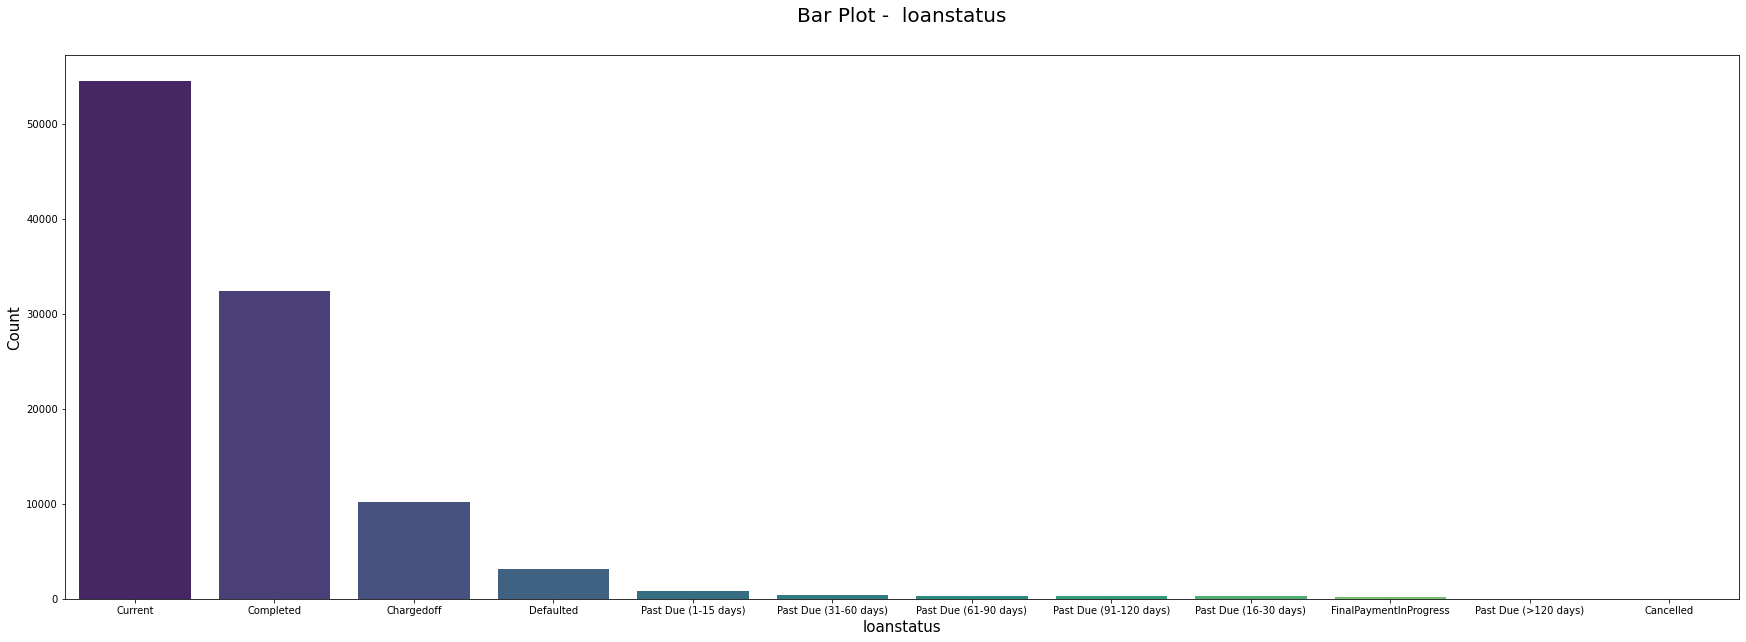

In [32]:
# loanstatus count plot
CatPlots('loanstatus', df,30,10)

> Majority of the Loans are Current (>50000), followed by Completed (>30000) and Chargedoff (>10000) caps off top three. 

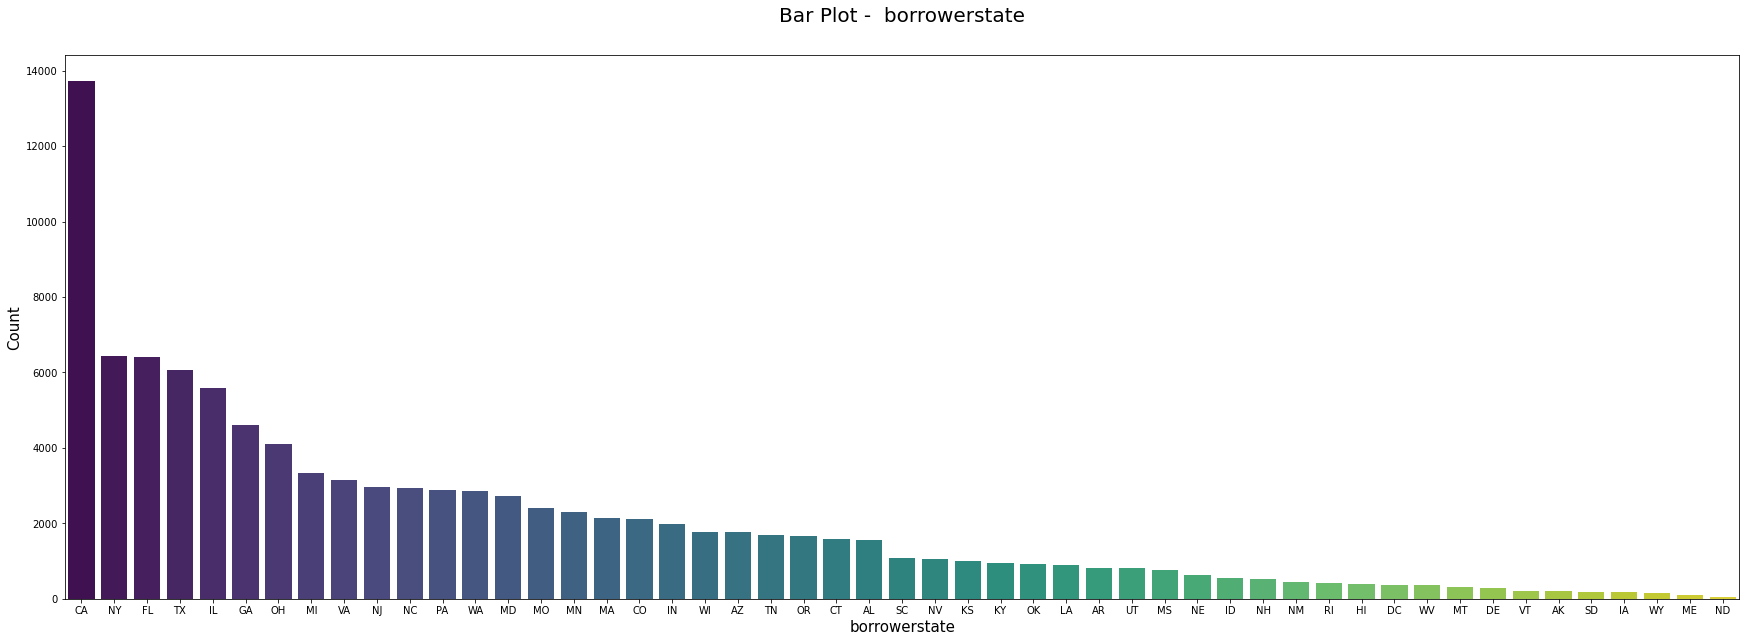

In [34]:
# borrowerstate count plot
CatPlots('borrowerstate', df,30,10)

> CA (California) has the highest number of borrowers whereas ND (Nevada) has the least number of borrowers.

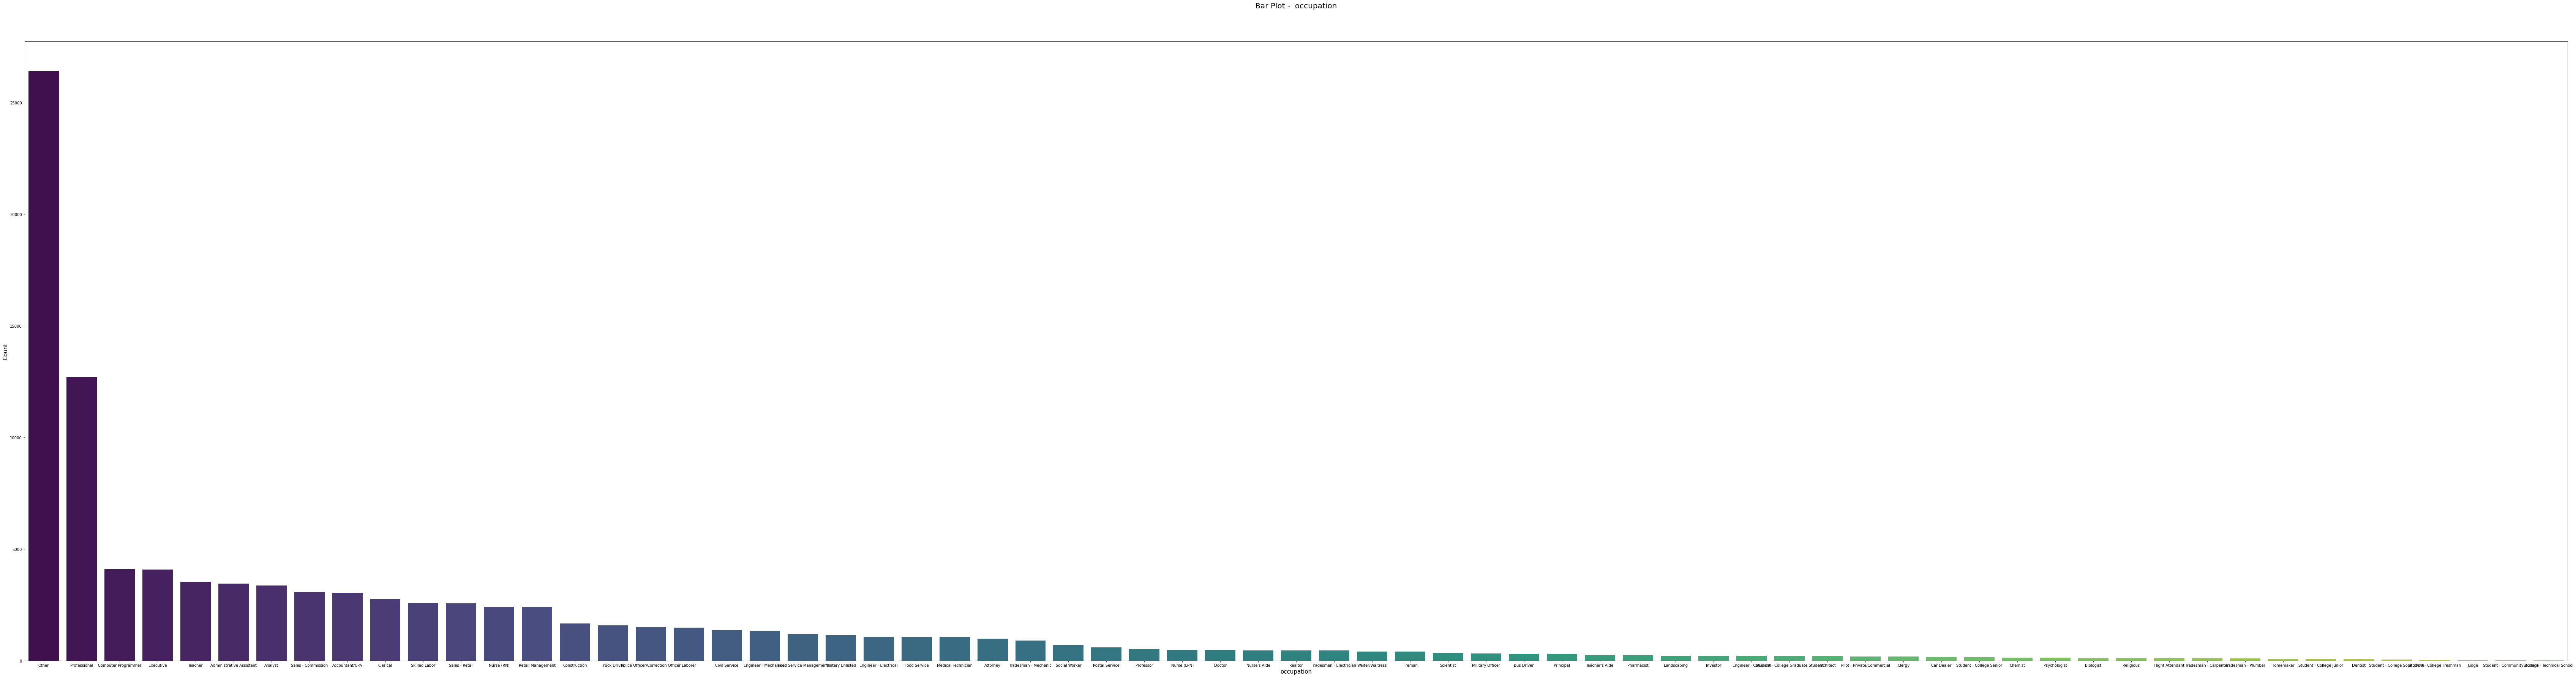

In [35]:
# occupation count plot
CatPlots('occupation', df,120,30)

> Eliminating the "Other" and "Proffesional" categories (undefined), majority of the borrowers are Computer Programmers, followed by Executives then Teachers. The least borrowers are Student- Technical School.

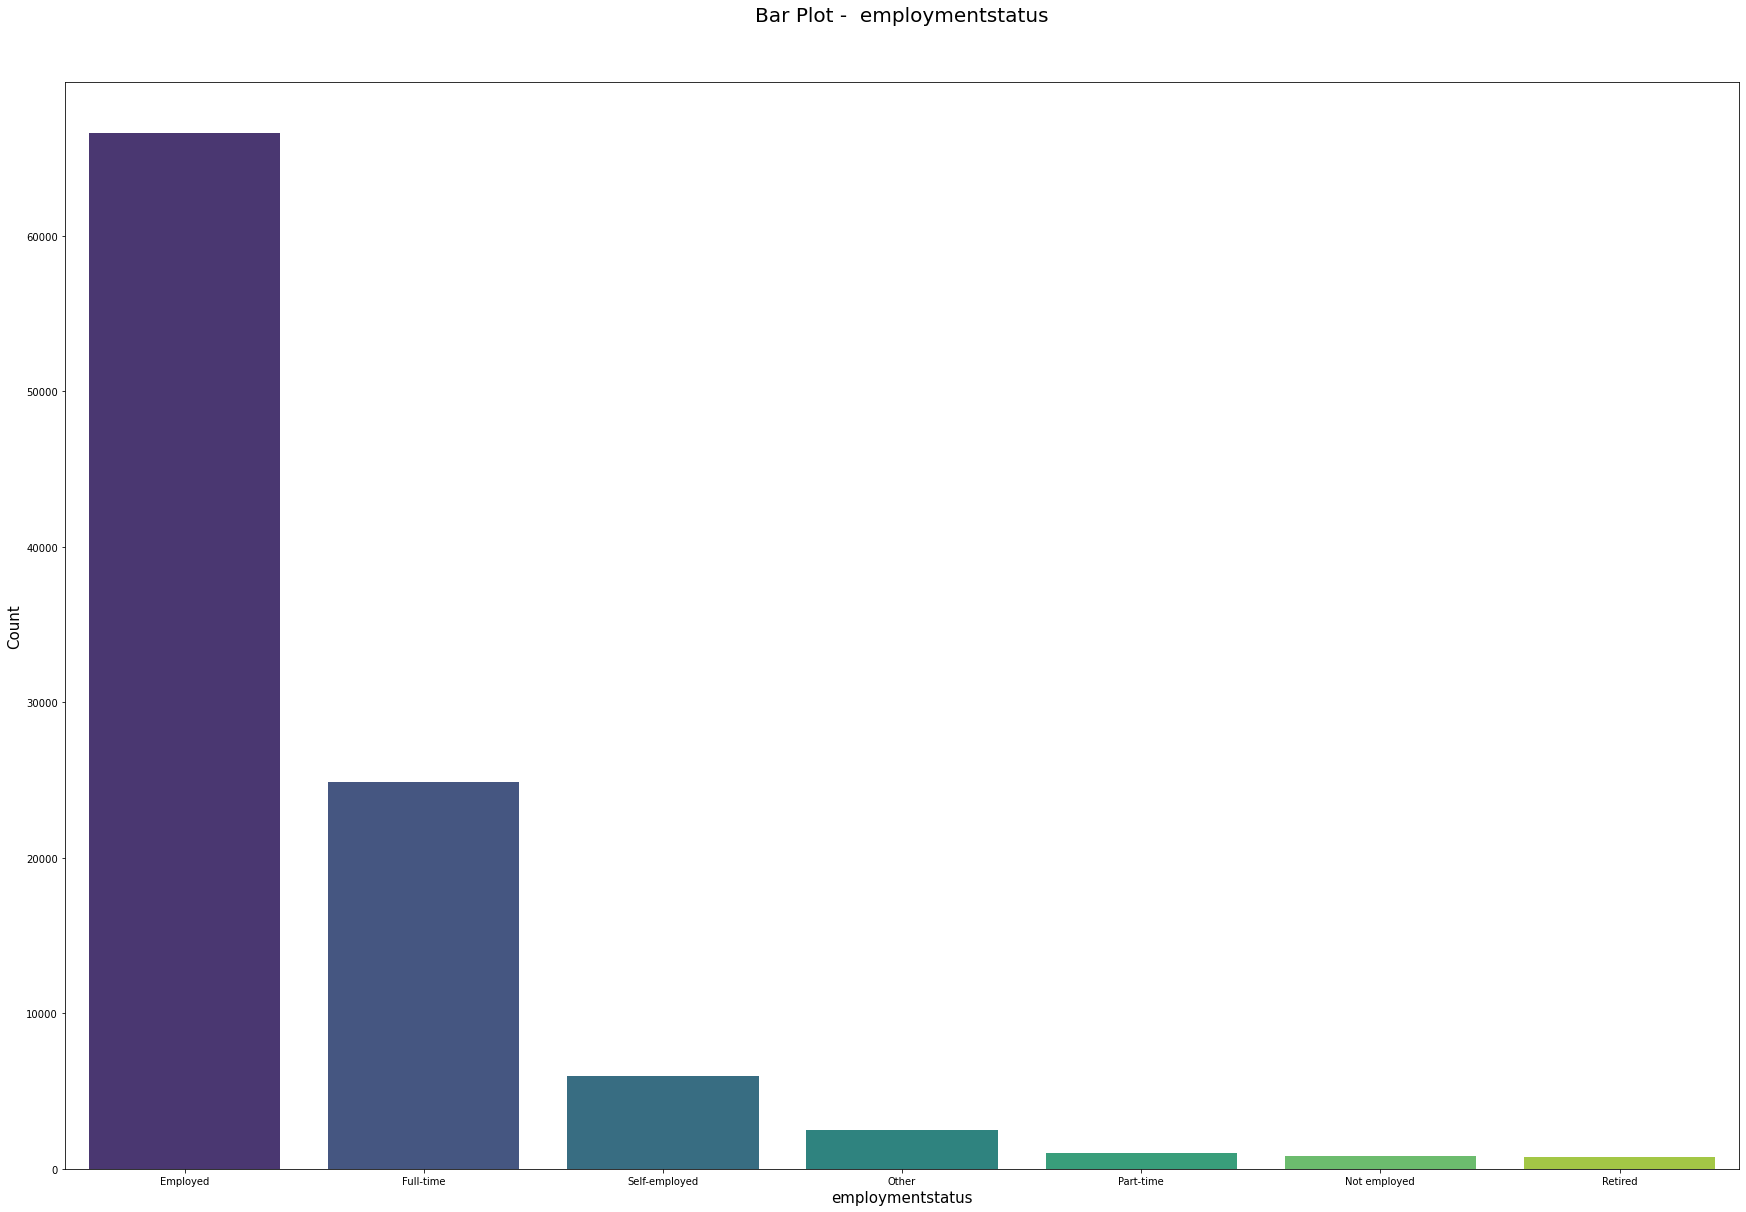

In [36]:
# employmentstatus count plot
CatPlots('employmentstatus', df,30,20)

> Majority of the borrowers are Employed. Full-time employees makes the biggest percentage of the employed borrowes. At the bottom, the Retired tends to borrow less. 

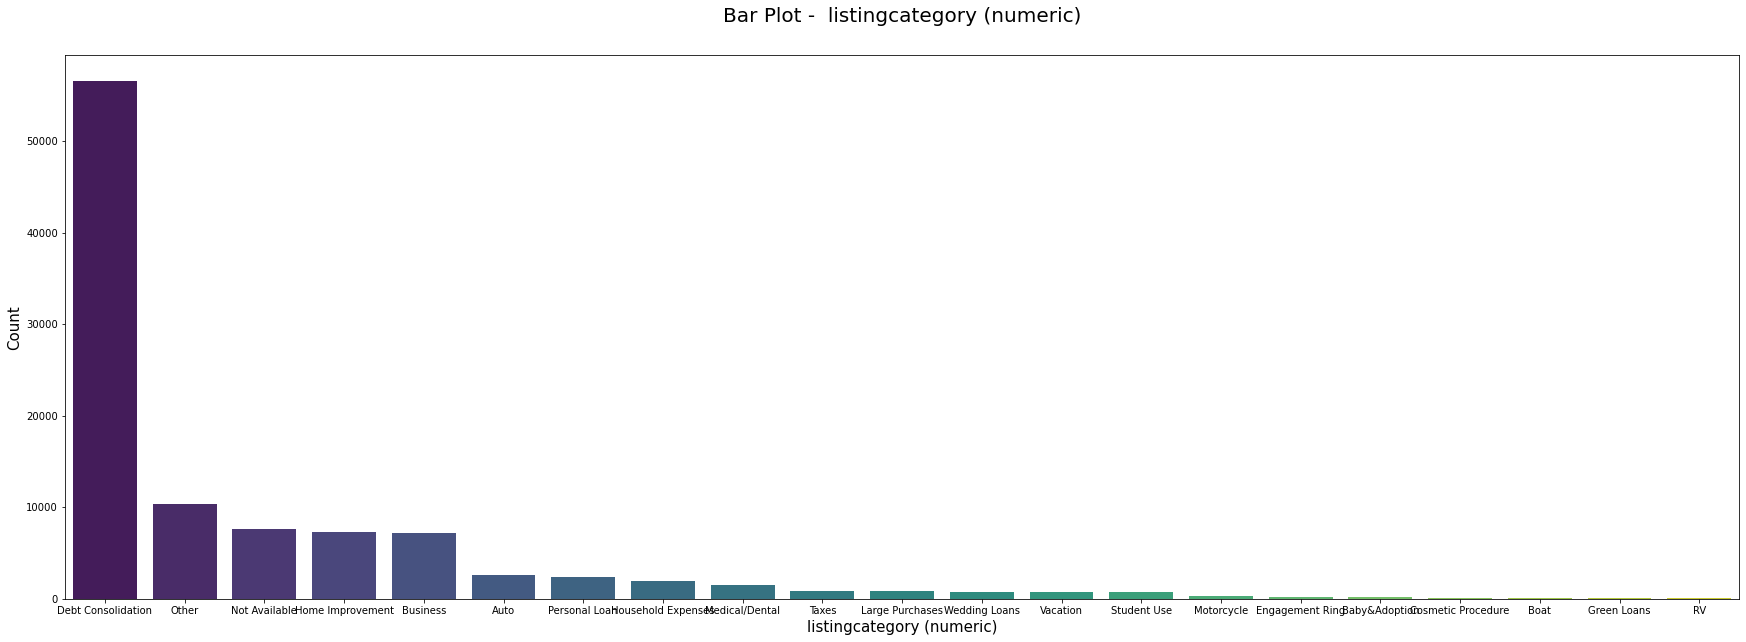

In [37]:
# listingcategory (numeric) count plot
CatPlots('listingcategory (numeric)', df,30,10)

> Majority of the borrowers takes loans to settle Debts while the least amount of debt are taken for RV

### Numerical Analysis

In [38]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")

In [39]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {np.subtract(data[column]['max'], data[column]['min'])}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")

In [40]:
# Distribution and Boxplot functions
def NumericalPlots(column, data1, data2):
  fig, ax = plt.subplots(2,2, figsize = (12,10))
  # Outliers
  # Distribution plot
  sb.distplot(data1[column], hist=True, ax=ax[0,0], color = 'green')
  ax[0,0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0,0].set_xlabel(column, fontsize=8)
  ax[0,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data1[column], ax = ax[0,1], color = 'green')
  ax[0,1].set_title(f'Outliers: Box Plot - {column}')
  ax[0,1].set_xlabel(column)

  # No outliers
  # Distribution plot
  sb.distplot(data2[column], hist=True, ax=ax[1,0], color = 'green')
  ax[1,0].set_title('No outliers: Freq dist '+ column, fontsize=10)
  ax[1,0].set_xlabel(column, fontsize=8)
  ax[1,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data2[column], ax = ax[1,1], color = 'green')
  ax[1,1].set_title(f'No outliers: Box Plot - {column}')
  ax[1,1].set_xlabel(column)
  plt.show()

In [41]:
# Numerical columns
numerical = df.select_dtypes(exclude = 'object').columns.tolist()
numerical

['term',
 'employmentstatusduration',
 'isborrowerhomeowner',
 'statedmonthlyincome',
 'loanoriginalamount',
 'monthlyloanpayment',
 'investmentfromfriendscount',
 'investors']

In [42]:
# Mean
MeasureCentral('mean', numerical, df)

term column mean = 41.240913395358824
employmentstatusduration column mean = 96.92292372426316
isborrowerhomeowner column mean = 0.5202038445392508
statedmonthlyincome column mean = 5694.338840294474
loanoriginalamount column mean = 8587.74987064463
monthlyloanpayment column mean = 279.58792582325964
investmentfromfriendscount column mean = 0.0246897911764993
investors column mean = 81.85392117620643


> It's interesting to note that the average amount of theh loan given to the borrowers is 8587.75  
and the average monthly income of the borrowers is 5694.34

In [43]:
# Median
MeasureCentral('median', numerical, df)

term column median = 36.0
employmentstatusduration column median = 68.0
isborrowerhomeowner column median = 1.0
statedmonthlyincome column median = 4830.333333
loanoriginalamount column median = 7000.0
monthlyloanpayment column median = 230.36
investmentfromfriendscount column median = 0.0
investors column median = 45.0


In [44]:
# Mode
MeasureCentral('mode', numerical, df)

term column mode = 0    36
dtype: int64
employmentstatusduration column mode = 0    4.0
dtype: float64
isborrowerhomeowner column mode = 0    True
dtype: bool
statedmonthlyincome column mode = 0    4166.666667
dtype: float64
loanoriginalamount column mode = 0    4000
dtype: int64
monthlyloanpayment column mode = 0    173.71
dtype: float64
investmentfromfriendscount column mode = 0    0
dtype: int64
investors column mode = 0    1
dtype: int64


In [45]:
# Variance
MeasureDistribution('var', numerical, df)

term column variance = 116.46789007253342
employmentstatusduration column variance = 8820.600551428613
isborrowerhomeowner column variance = 0.24959424137192246
statedmonthlyincome column variance = 29711221.923535064
loanoriginalamount column variance = 39386164.94100053
monthlyloanpayment column variance = 36924.14653338347
investmentfromfriendscount column variance = 0.05791818332620876
investors column variance = 11035.108515299286


In [46]:
# Standard Deviation
MeasureDistribution('std', numerical, df)

term column std = 10.792029006286697
employmentstatusduration column std = 93.91805231918204
isborrowerhomeowner column std = 0.4995940765981143
statedmonthlyincome column std = 5450.800117738227
loanoriginalamount column std = 6275.8397797426705
monthlyloanpayment column std = 192.15656776020816
investmentfromfriendscount column std = 0.24066196900675593
investors column std = 105.04812475860426


In [47]:
# Skew
MeasureDistribution('skew', numerical, df)

term column skew = 0.8303337385774341
employmentstatusduration column skew = 1.5496202623133757
isborrowerhomeowner column skew = -0.08088262043234827
statedmonthlyincome column skew = 37.84782683946463
loanoriginalamount column skew = 1.1792275446910687
monthlyloanpayment column skew = 1.3934148588040733
investmentfromfriendscount column skew = 43.36166466134188
investors column skew = 2.102163059571002


In [48]:
# Kurtosis
MeasureDistribution('kurt', numerical, df)

term column kurt = 0.028477695830338767
employmentstatusduration column kurt = 2.566146282080757
isborrowerhomeowner column kurt = -1.9934969257965354
statedmonthlyincome column kurt = 3283.252247580964
loanoriginalamount column kurt = 1.2329688995271697
monthlyloanpayment column kurt = 3.205517989565089
investmentfromfriendscount column kurt = 4333.429606003412
investors column kurt = 5.850756672397518


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The data generally looks okay and the distributions looks normal. However, there was one point on the statedmonthlyincome (the max value) which looks to be an anomaly. This point was dropped. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For analysis on listingcategory (numeric) column, this column was transformed to character data type by changing the numerical assigned values of 0-20 to their respective meanings. 

## Bivariate Exploration

> In this section, will investigate the relationships betwene the variables and specificaaly norrow down to those which are highly correlated.

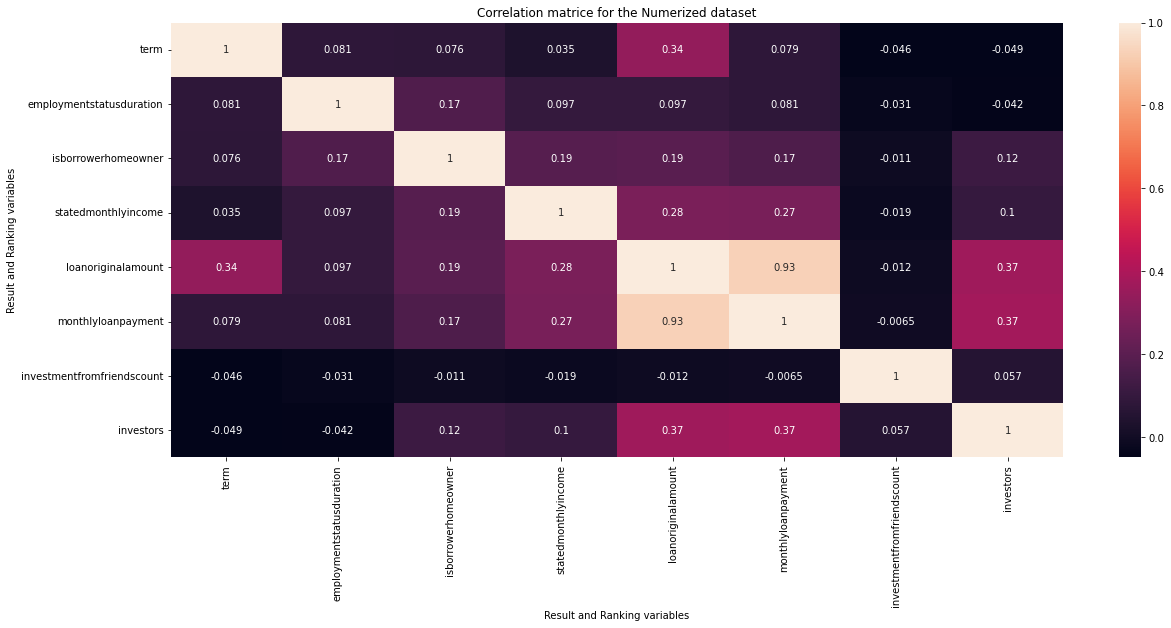

In [49]:
# Heatmap of correlation
plt.figure(figsize=(20,8))
corr_matrix = df.corr(method = 'pearson')

sb.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrice for the Numerized dataset")

plt.xlabel("Result and Ranking variables")

plt.ylabel("Result and Ranking variables")

plt.show()

> There is a high correlation (>0.5) between:

    * monthlyloanpayment and loanoriginalamount

> There is a medium correlation (0.2<x<0.5) between:

    * loanoriginalamount and term
    * loanoriginalamount and statedmonthlyincome
    * monthlyloanpayment and statedmonthlyincome
    * investors and loanoriginalamount
    * investors and monthlyloanpaymnet

>Will look deeper on these correlations using scatter plots

In [50]:
# Scatter plots function
def cor(col1,col2,d):
  ans = sb.regplot(x = col1, y = col2, data = d, scatter_kws = {"color": "red"}, line_kws = {"color": "black"})
  return ans

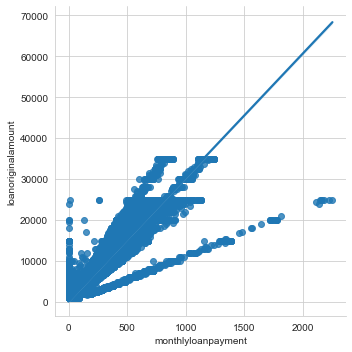

In [51]:
# monthlyloanpayment and loanoriginalamount
sb.set_style('whitegrid')
sb.lmplot(x='monthlyloanpayment',y='loanoriginalamount',data=df)

> Monthly loan payment is positively correlated to loan original amount.

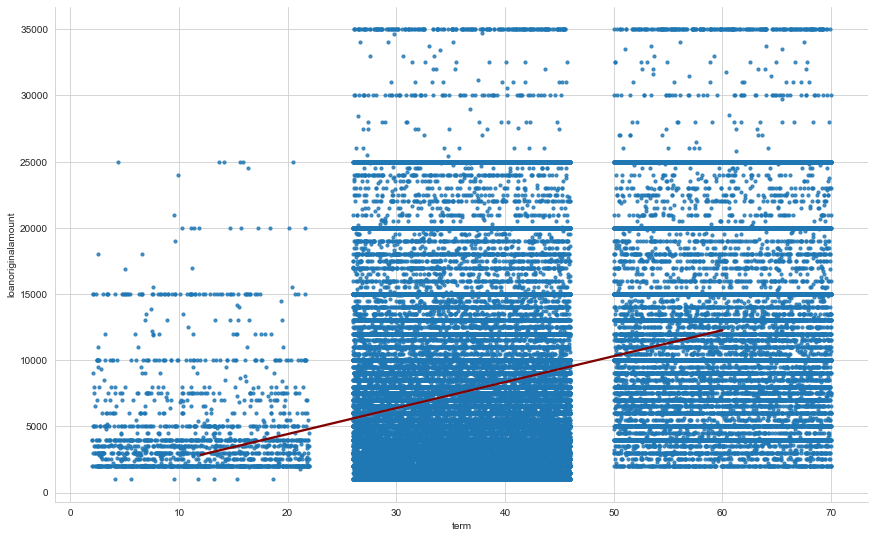

In [64]:
# loanoriginalamount and term
sb.set_style('whitegrid')
k=sb.lmplot(x='term', y='loanoriginalamount',data=df, x_jitter=10,scatter_kws={'s':10},line_kws={'color':'maroon'})

#set plot size
k.fig.set_size_inches(14,8)

> Loan original amount is positively correlated to Term of loans duration.

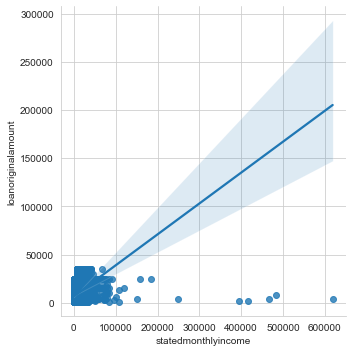

In [53]:
# loanoriginalamount and statedmonthlyincome
sb.set_style('whitegrid')
sb.lmplot(x='statedmonthlyincome',y='loanoriginalamount',data=df)

> Stated monthly income is positively correlated to loan original amount

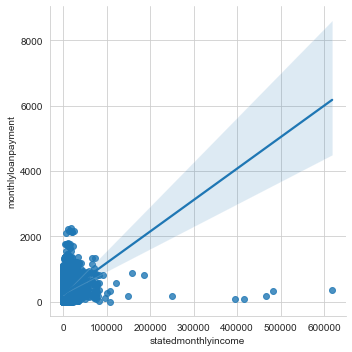

In [54]:
# monthlyloanpayment and statedmonthlyincome
sb.set_style('whitegrid')
sb.lmplot(x='statedmonthlyincome',y='monthlyloanpayment',data=df)

> Stated monthly income is positively correlated to monthly loan payment

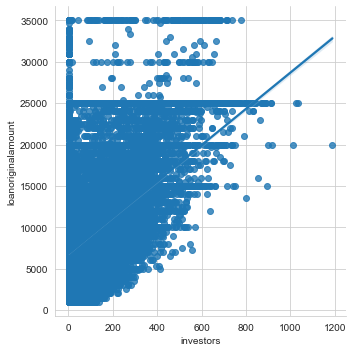

In [55]:
# investors and loanoriginalamount
sb.set_style('whitegrid')
sb.lmplot(x='investors',y='loanoriginalamount',data=df)

> Number of Investors is positively correlated to Loan original amount. 

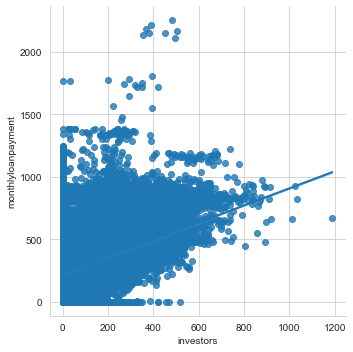

In [56]:
# investors and monthlyloanpaymnet
sb.set_style('whitegrid')
sb.lmplot(x='investors',y='monthlyloanpayment',data=df)

> Number of Investors is positively correlated to monthly loan payment.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From this section, we witnessed a correlation between the following variables:

Highly corrolated >0.5

* monthlyloanpayment and loanoriginalamount

Medium correlation (0.2<x<0.5

* loanoriginalamount and term
* loanoriginalamount and statedmonthlyincome
* monthlyloanpayment and statedmonthlyincome
* investors and loanoriginalamount
* investors and monthlyloanpaymnet

Other variables were hardly correlated hence no special attention was given to them.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Even though the Investors variables were not the main concern of this analysis, it is worthwhile to note that Number of investors correlates positively with monthly loan payment and loan original amount. This shows that, the higher the number of investors, the higher the monthly loan paymnet and loan original amount.

## Multivariate Exploration

> In this section, we will dig deeper to look into the two highly correlated features i.e monthlyloanpayment and loanoriginalamount and check if loan term limits and wether a borrower is a home owner or not influences this correlation.

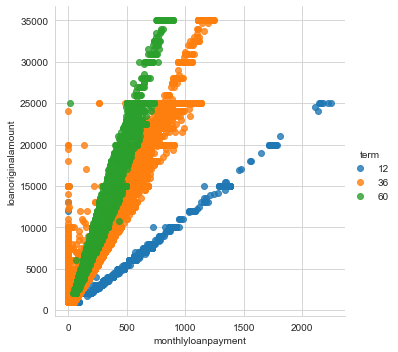

In [57]:
# A keener look in monthlyloanpayment and loanoriginalamount grouped by loan Term
sb.lmplot(x='monthlyloanpayment', y='loanoriginalamount', hue='term', 
           data=df.loc[df['term'].isin([12, 36, 60])], 
           fit_reg=False)

> As much as the monthly loan paymnet is positively correlated to the loan original amount, it is interesting to note that there is a variance as per the steepness of the correlation. Loans with term limits of 12 tends to get lower loan original amount with  a higher repayment amount compared to long term loans (60 months) which has a higher loan original amount with a lower monthly repayment amount. 

<AxesSubplot:title={'center':'A plot of monthlyloanpayment vs loanoriginalamount grouped by whether the borrower is a home owner or not'}, xlabel='monthlyloanpayment_cat', ylabel='loanoriginalamount'>

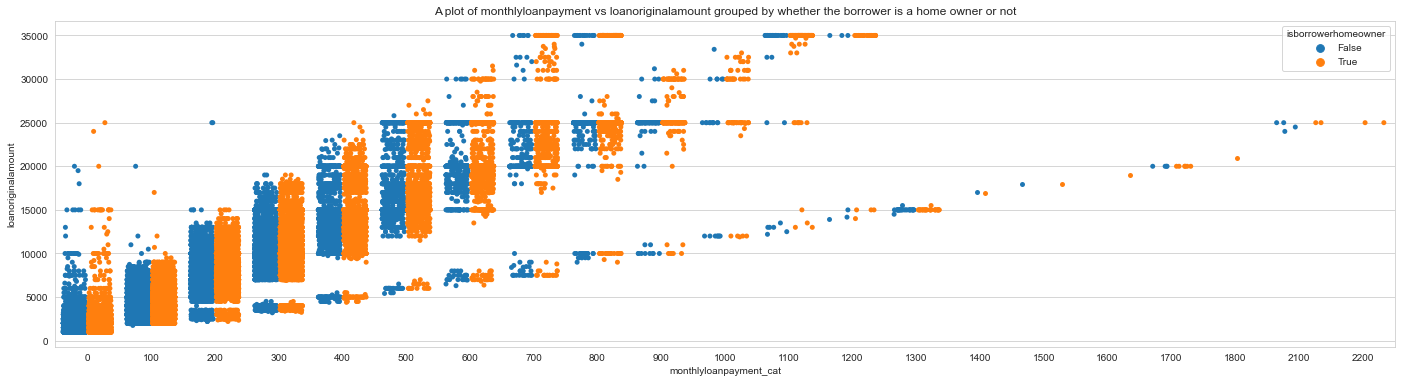

In [63]:
# select data
data = df.loc[df['isborrowerhomeowner'].isin([True,False])].dropna(subset=['monthlyloanpayment']).copy()
# create categorical monthly inconme variable
data['monthlyloanpayment_cat']= ((data['monthlyloanpayment']//100)*100).astype(int)

# set plot dimensions
plt.figure(figsize=[24,6])
plt.title("A plot of monthlyloanpayment vs loanoriginalamount grouped by whether the borrower is a home owner or not")

# A keener look in monthlyloanpayment and loanoriginalamount grouped by whether the borrower is a home owner or not
sb.stripplot(x='monthlyloanpayment_cat',y='loanoriginalamount', hue='isborrowerhomeowner', data=data, jitter=0.35, dodge=True)


> In this case, we don't have a clear difference for home owners or not home owners. However, the majority of borrowers are home owners.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section, we get a look on the relationship between monthlyloanpayment, loanoriginalamount and term. There is an interesting correlation between these three variables.
> Also, we check on the relationship between monthlyloanpayment, loanoriginalamount and isborrowerhomeowner. There is no clear relationships here.

### Were there any interesting or surprising interactions between features?

> It's interesting to see how the term is perfectly clustered in the monthlyloanpayment vs loanoriginalamount scatter. This relationship clearly shows that those who borrow short loans pay more in repayment monthly while those who borrow long term loans pay less in repayment monthly.

In [72]:
df.to_csv("cleaneddataset.csv")

## Conclusion
>From this analysis, we can conclude that:

    * Majority of the borrowers are from CA (California)
    * Majority of the borrowers are Computer Programers
    * Majority of the borrowers are Employed
    * Majority of the borrowers are taking loans for Debt Consolidation
    * The median term for loans is 36 months
    * Majority of the borrowers are home owners
    * The average monthly income of the borrowers is 5694.34
    * The average amount of the loan given to the borrowers is 8587.75
    * The average monthly loan repayment is 279.58

>From the above insights, we can therefore profile an ideal candidate for a loan as:

* An employed Computer Programer from Californian who owns a home and has debts to consolidate and earns a monthly salary of $5694.34.